# Go Long or Short?
## How does volatility affect returns of S&P 500 stocks?
 
 **Krupa Patel and Melanie Schnell**
 
This Research Project was conducted at NYU Stern's DataBootcamp course.
For further inquireies please reach out to Krupa Patel at [kp1524@nyu.edu](kp1524nyu.edu) and Melanie Schnell as [ms7557@nyu.edu](ms7557@nyu.edu).

There is a common saying that states, "the higher the risk, the bigger the return." However, in the past volatile markets have yielded negative returns for many investors. This leads us to explore the question: Is it profitable to go long or short when volatility is high?

We will use 57 years of S&P index to find the returns and volatilty. Then, we will normalize this times series, plot the data in a scatterplot, and run a regression to see if we get a positive or negative correlation between increasing volatility and returns.

If there is a positive slope it signifies that when volatility is high the returns are also high. However, if we get a negative slope it signifies that when volatility is high, returns are low.

Our data can easily be accessed [here](https://finance.yahoo.com/quote/%5EGSPC/history?period1=-630961200&period2=1494475200&interval=1d&filter=history&frequency=1d).

## Step 1: Install Packages
To begin, we installed the necessary packages to read, manipulate, and plot our dataframe.

In [29]:
import pandas as pd                        #Data Management Package
import pandas_datareader as pd_rd          #Data Reader Package
import numpy as np                         #Numerical Computing Package
import matplotlib.pyplot as plt            #Graphics Package
%matplotlib inline
import seaborn as sns                      #Graphics Package to Complement Matplotlib
import statsmodels.formula.api as smf      #Statistical Computing Package

## Step 2: Import Data
We found our data on [Yahoo Finance](https://finance.yahoo.com/quote/%5EGSPC/history?period1=-630961200&period2=1494475200&interval=1d&filter=history&frequency=1d) and click the download button to save a csv file. The file is named S&P_data.csv and saved to a Databootcamp folder. Our data did not need any changes. Next, we just needed to read in the data with the code below.

In [30]:
path= "/Users/MelanieSchnellAccount/Desktop/Senior_Year/Data_Bootcamp/S&P_data.csv"
df=pd.read_csv(path)

The path will vary based on what type of machine is processing the data, and where the file is saved on the computer. Be sure to update this code with your unique file path. The file path can be easily copied and pasted from file information page.

## Step 3: Arrange the Data

Next we reversed the dataframe to put the date in order by index, old to new. We also renamed the column "Adj Close" to "close" to make it better for slicing.

In [31]:
df = df.rename(columns={'Adj Close': 'close'})
reversed_df = df.loc[::-1]
rdf=pd.DataFrame(reversed_df)

## Step 4: Calculations
**1 Day Return Calculation**

This calculates the return after the close of one day. We calculated this by finding the difference between consecutive "close" column values, before dividing that difference by the newer value.

In [32]:
return1 = (rdf.close[1:].values - rdf.close[:-1].values) / rdf.close[:-1].values

return1 = pd.Series(return1, index=rdf.index[1:])

rdf["return1"]=return1
# calculates the return for the close column

**20 Day Return Calculation**

This calculates the return over the course of 20 days. We calculated this by finding the difference between "close" values that are 20 days appart, before dividing that differnce by the older value.

In [33]:
ret20 = (rdf.close[20:].values - rdf.close[:-20].values)/rdf.close[:-20].values

ret20 = pd.Series(ret20, index=rdf.index[20:])
rdf["ret20"]=ret20




**20 Day Volatility Calculaion**

This applies a standard deviation to the volatility values over 20 days.

In [34]:
vol20= rdf["return1"].rolling(window=20).apply(np.std)
rdf["vol20"]=vol20

#Apply standard deviation to the volitility over 20 days

**Normalized 20 Day Return**

We used a 250 day frame and normalized the data since it is a times series.

In [35]:
zret20=((rdf.ret20[270:].values)-(rdf.ret20[270:].rolling(window=250).apply(np.mean)))/(rdf.ret20[270:].rolling(window=250).apply(np.std))
zret20=pd.Series(zret20, index=rdf.index[270:])
rdf["zret20"]=zret20

# Remove the effects of imflation, make the data comparable

**Normalized 20 Day Volatility**

This makes the volatility data comparable as well by making the data normalized.

In [36]:
zvol20=((rdf.vol20[270:].values)-(rdf.vol20[270:].rolling(window=250).apply(np.mean)))/(rdf.vol20[270:].rolling(window=250).apply(np.std))
zvol20=pd.Series(zvol20, index=rdf.index[270:])
rdf["zvol20"]=zvol20

## Step 5: Create the Data Table
**Table Dimensions**

In [37]:
rdf.shape


(16930, 12)

**Table Formatting**

First, we created a new Dataframe called zvol20ret20 by copying the normalized 20 day volatiliy and returns columns. We then renamed the columns "Volatility" and "Returns" to add clarity. Next, we eliminated the values that were nullified in the process of normalization, and sorted the rows by ascending order of volatility.

In [10]:
zvol20ret20=rdf[["zvol20", "zret20"]].copy()
zvol20ret20 = zvol20ret20.rename(columns={'zvol20' : 'Volatility', 'zret20' : 'Returns'})

In [11]:
zvol20ret20 = zvol20ret20[zvol20ret20.Volatility.notnull()]
zvol20ret20 = zvol20ret20[zvol20ret20.Returns.notnull()] 


## Step 6: Plot the Data
**Scatter Plot**

We used seaborn to plot the data in a scatter plot to visually display the relationship between volatility and returns. The regression line demonstrates that (while points tend to cluster between -2 and 3 Volatility, and -3 and 2 Returns) there is a general trend towards lower returns during high market volatility.

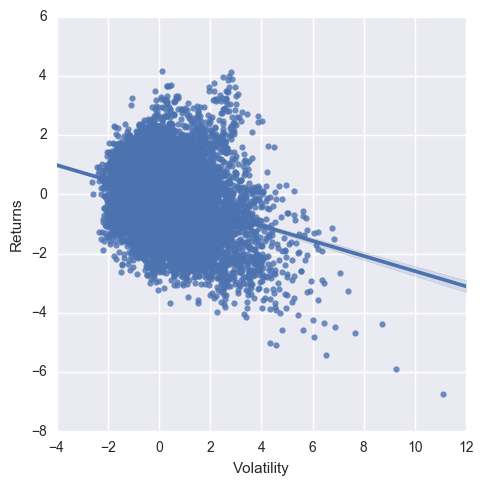

In [13]:
sns.lmplot(x='Volatility',y='Returns',data=zvol20ret20,fit_reg=True)

**Regression Results**

The R-squared value (0.085) is very close to 0, showing that there is a weak association between volatility and return. However, the negative slope coefficient (-0.33) of the regression indicates that as volatility increases, returns tend to decrease. Also, while there is a cluster of positive returns between volatility levels of -3 and 4, there are no points that indicate a positive return after a volatility level of 6. This means that it is very unlikely to recieve a positive return during times of high market volatility.

In [45]:
reg = smf.ols(formula='Volatility ~ Returns', data=zvol20ret20).fit()
reg.params
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Volatility   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     1520.
Date:                Thu, 11 May 2017   Prob (F-statistic):          5.25e-318
Time:                        16:54:27   Log-Likelihood:                -25861.
No. Observations:               16411   AIC:                         5.173e+04
Df Residuals:                   16409   BIC:                         5.174e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0304      0.009      3.323      0.001         0.012     0.048
Returns       -0.3310      0.008    -38.984      0.000        -0.348    -0.314
==============================================================================
Omnibus:                     3107.093   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6140.265
Skew:                           1.147   Prob(JB):                         0.00
Kurtosis:                       4.927   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Negative Correlation**

We calculated that the correlation between volatility and returns is -0.291. Because the value is negative, we see that high volatility yeilds low returns.

In [15]:
zvol20ret20.corr()

,Volatility,Returns
Volatility,1.000000,-0.291146
Returns,-0.291146,1.000000


## Step 7: Quintiles

**Quintile Table**

Because the points were clustered in the scatter plot, and the results showed a weak R-squared value, we grouped the data by quintiles. This showed a much clearer result with a stronger R-squared value. To accomplish this, we sorted the rows by volatility, from low to high. Because there are 16,411 rows in the dataframe, we took the mean of Returns in groups of 3,283 (one fifth of the total number of rows) and created a new dataframe with these values. In the new dataframe we assigned the volatiliy values one through five (one being the lowest volatility and five being the highest).

In [40]:
zvol20ret20=zvol20ret20.sort_values('Volatility', ascending=True)

In [41]:
zvol20ret20 = zvol20ret20.reset_index(drop=True)

In [18]:
Ret=zvol20ret20.Returns.groupby(np.arange(len(zvol20ret20.Returns))//3283).mean().tolist()
Return= pd.Series(Ret)
quintileframe= pd.DataFrame({"Volatility":[1,2,3,4,5]})
quintileframe['Return'] = Return.values

In [19]:
quintileframe


,Volatility,Return
0,1,0.246311
1,2,0.127676
2,3,0.025283
3,4,-0.088610
4,5,-0.523899


**Quintile Plot**

We used seaborn to create a scatter plot with a regression line of the quintile data. The graph shows a clearer association between increasing volatility and decreasing returns. 

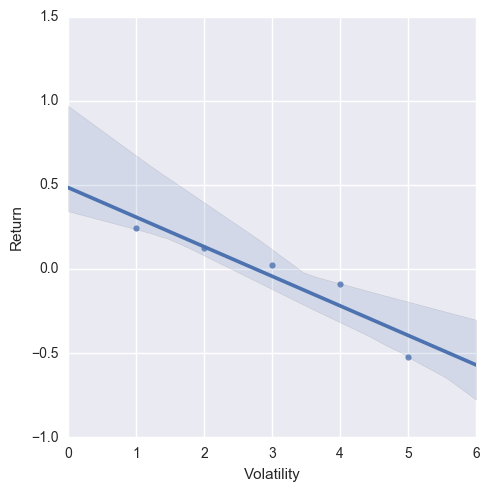

In [44]:
sns.lmplot(x='Volatility',y='Return',data=quintileframe,fit_reg=True)

**Quintile Regression Results**

When we break the data into quintiles, there is a much higher R-squared value (0.88), demonstrating a stronger association between volatility and returns. We are aware that five points are not enough to run an accurate regression; however, because of the strong correlation value (-0.937) and the negative coefficient (-5) we are reassured that on average high volatility does lead to lower returns.

In [43]:
quintilereg=smf.ols(formula='Volatility ~ Return', data=quintileframe).fit()
quintilereg.params
quintilereg.summary()


/Users/MelanieSchnellAccount/anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Volatility   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     21.92
Date:                Thu, 11 May 2017   Prob (F-statistic):             0.0184
Time:                        16:46:10   Log-Likelihood:                -3.5349
No. Observations:                   5   AIC:                             11.07
Df Residuals:                       3   BIC:                             10.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.7865      0.287      9.711      0.002         1.873     3.700
Return        -5.0072      1.069     -4.682      0.018        -8.411    -1.604
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.643
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.518
Skew:                           0.431   Prob(JB):                        0.772
Kurtosis:                       1.680   Cond. No.                         3.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
quintileframe.corr()

,Volatility,Return
Volatility,1.000000,-0.937878
Return,-0.937878,1.000000


# Conclusion

Through our analysis of S&P 500 data from the last 57 years, we conclude that at times of high volatility, returns tend to be negative. Therefore, when there is high volatility, it is safer to go short.